In [197]:
#import the goods
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sci
import statsmodels.api as sm
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sqlalchemy import create_engine
from sklearn.preprocessing import LabelEncoder


In [4]:
import warnings

warnings.filterwarnings('ignore')



postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user,postgres_pw, postgres_host, postgres_port, postgres_db))

houseprice_df = pd.read_sql_query('select * from houseprices', con=engine)

engine.dispose()

In [6]:
houseprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [10]:
houseprice_df.tail(20)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
1420,1421,60,RL,90.0,11700,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2006,WD,Normal,179900
1421,1422,120,RL,53.0,4043,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,7,2010,WD,Normal,127500
1422,1423,120,RM,37.0,4435,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,3,2008,WD,Normal,136500
1423,1424,80,RL,NaN,19690,Pave,None,IR1,Lvl,AllPub,...,738,Gd,GdPrv,None,0,8,2006,WD,Alloca,274970
1424,1425,20,RL,NaN,9503,Pave,None,Reg,Lvl,AllPub,...,0,None,GdWo,None,0,6,2007,WD,Normal,144000
1425,1426,20,RL,80.0,10721,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,10,2008,WD,Normal,142000
1426,1427,60,RL,81.0,10944,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,8,2008,WD,Normal,271000
1427,1428,50,RL,60.0,10930,Pave,Grvl,Reg,Bnk,AllPub,...,0,None,None,None,0,4,2008,WD,Normal,140000
1428,1429,30,RM,60.0,7200,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,2,2010,WD,Abnorml,119000
1429,1430,20,RL,NaN,12546,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,4,2007,WD,Normal,182900


In [16]:
#making a copy of the original housing dataframe and creating a copy;  then using label encoder to transform all columns to int 

label_encoder = LabelEncoder()

hp_EDA = houseprice_df.copy()

for column in hp_EDA.select_dtypes(include=['object']).columns:
    hp_EDA[column] = label_encoder.fit_transform(hp_EDA[column])

hp_EDA.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   int64  
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   int64  
 6   alley          1460 non-null   int64  
 7   lotshape       1460 non-null   int64  
 8   landcontour    1460 non-null   int64  
 9   utilities      1460 non-null   int64  
 10  lotconfig      1460 non-null   int64  
 11  landslope      1460 non-null   int64  
 12  neighborhood   1460 non-null   int64  
 13  condition1     1460 non-null   int64  
 14  condition2     1460 non-null   int64  
 15  bldgtype       1460 non-null   int64  
 16  housestyle     1460 non-null   int64  
 17  overallqual    1460 non-null   int64  
 18  overallc

In [124]:
#Took out the non relevant columns needed to make predictions  
cols_1 =['saleprice','overallqual','yearbuilt','yearremodadd','grlivarea','garagearea','garagecars','totrmsabvgrd','fullbath', 'firstflrsf','yearbuilt']

hp_EDA[cols_1].corr()
#create a new dataframe for the features
hp_models = hp_EDA[cols_1]




Text(0.5, 1.0, 'Distribution of sale price')

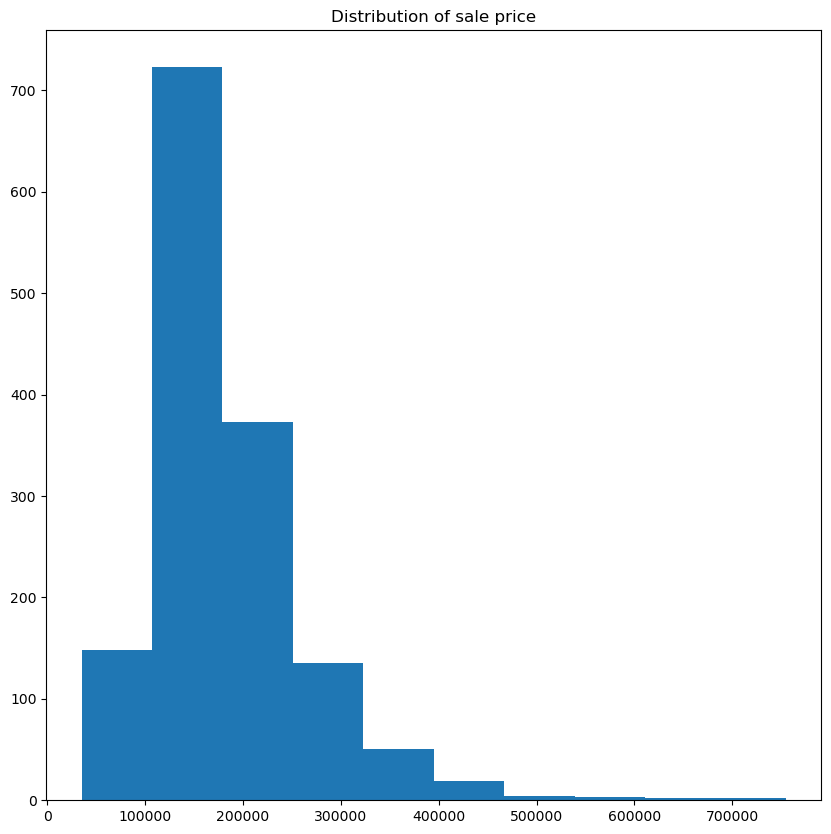

In [138]:
#plotting the distribution of the target. 
plt.figure(figsize=(10,10))
plt.hist(hp_models['saleprice'])
plt.title('Distribution of sale price')

In [150]:
#start building the model 
#X & Y are our target and prediction variable
Y = hp_models['saleprice']

X = hp_models.drop(['saleprice'], axis=1)

#test spliting the data for analysis 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= .2, random_state= 365)


In [187]:
#log regression
lr_class = LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=1000)
lr_class.fit(X_train, Y_train)
lr_class_score = cross_val_score(lr_class, X_train, Y_train, cv=5)
print(lr_class.score(X_train, Y_train))
print(lr_class.score(X_test,Y_test))
results = sm.OLS(X_train, Y_train).fit


0.13184931506849315
0.003424657534246575


AttributeError: 'function' object has no attribute 'summary'

In [207]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 772 to 1104
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   overallqual   292 non-null    int64
 1   yearbuilt     292 non-null    int64
 2   yearremodadd  292 non-null    int64
 3   grlivarea     292 non-null    int64
 4   garagearea    292 non-null    int64
 5   garagecars    292 non-null    int64
 6   totrmsabvgrd  292 non-null    int64
 7   fullbath      292 non-null    int64
 8   firstflrsf    292 non-null    int64
 9   yearbuilt     292 non-null    int64
dtypes: int64(10)
memory usage: 25.1 KB


In [235]:
#KNN
neighbors = KNeighborsClassifier(n_neighbors=2)
neighbors.fit(X_train, Y_train)

Y_pred = neighbors.predict(X_test)

X_test_array = X_test[['overallqual','yearbuilt','yearremodadd','grlivarea','garagearea','garagecars','totrmsabvgrd','fullbath', 'firstflrsf','yearbuilt']
].values

Y_test_array = Y_test.values

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(Y_test, Y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(Y_test, Y_pred))

# Plot decision regions (using only the first two features for visualization)
plt.figure(figsize=(10, 6))
plot_decision_regions(X_test_array, Y_test, clf=neighbors, legend=2)
plt.xlabel(Y_test['saleprice'])
plt.ylabel(X_test['yearbuilt'])
plt.title(f'KNN Decision Regions (k={2})')
plt.show()

Accuracy: 0.02
Classification Report:
              precision    recall  f1-score   support

       34900       0.00      0.00      0.00         1
       39300       0.00      0.00      0.00         1
       52500       0.00      0.00      0.00         0
       58500       0.00      0.00      0.00         0
       60000       0.00      0.00      0.00         0
       64500       0.00      0.00      0.00         0
       68400       0.00      0.00      0.00         0
       76500       0.00      0.00      0.00         0
       79000       0.00      0.00      0.00         1
       79500       0.00      0.00      0.00         0
       79900       0.00      0.00      0.00         1
       80000       0.00      0.00      0.00         1
       81000       0.00      0.00      0.00         1
       82000       0.00      0.00      0.00         1
       83000       0.00      0.00      0.00         1
       83500       0.00      0.00      0.00         0
       84500       0.00      0.00      0.00

ValueError: y must be a NumPy array. Found <class 'pandas.core.series.Series'>

<Figure size 1000x600 with 0 Axes>